## Deviation detection

In [1]:
import math
import statistics
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("D:/Data Analysis/Python Data Science/ML100Days/Data/Titanic_train.csv")
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Mean: 29.69911764705882
Sd: 14.526497332334042


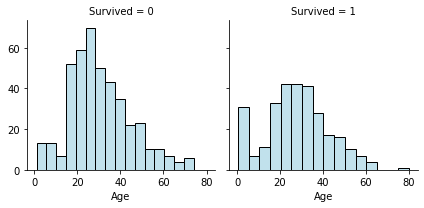

In [3]:
print('Mean:', df_train['Age'].mean()) 
print('Sd:', df_train['Age'].std()) 

g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.histplot, 'Age', kde=False, color='lightblue')

## Statistics

In [4]:
print(df_train['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


## Z-score method

In [5]:
# Create a function to find the outliers
def outliers_z_score(data, times):
    mean_y = np.mean(data)
    stdev_y = np.std(data)
    z_scores = [(y - mean_y) / stdev_y for y in data]
    return np.where(np.abs(z_scores) > times)

# 3 sigma
out_index = outliers_z_score(df_train['Age'], 3)
print('The index of outliers:', out_index[0])
print(df_train.loc[out_index[0], 'Age'])

The index of outliers: [630 851]
630    80.0
851    74.0
Name: Age, dtype: float64


## IQR method

In [6]:
def outliers_iqr(data,times):
    quartile_1, quartile_3 = np.nanpercentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * times)
    upper_bound = quartile_3 + (iqr * times)
    return np.where((data > upper_bound) | (data < lower_bound))

# 1.5 IQR
out_index2 = outliers_iqr(df_train['Age'], 1.5)
print('The index of outliers:', out_index2)
print(df_train.loc[out_index2[0],'Age'])

The index of outliers: (array([ 33,  54,  96, 116, 280, 456, 493, 630, 672, 745, 851], dtype=int64),)
33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


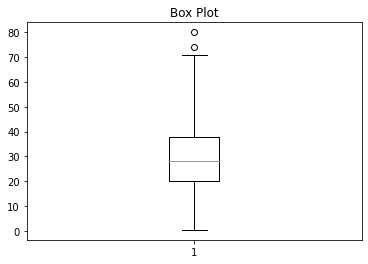

In [7]:
# Filter the nan values
plt.boxplot(df_train['Age'][~np.isnan(df_train['Age'])], whis=2) 
plt.title('Box Plot')
plt.show()